# End-to-end ML project walkthrough: Titanic

The goal of this notebook is to build an end-to-end Machine Learning project and outline core steps in building and training machine learning model.

## Machine Learning Project Checklist
> This list is based on a list available in ['Hands-On Machine Learning with scikit-learn, TensorFlow and Keras'](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurelien Geron.
1. Frame the problem and look at the big picture 
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
5. Explore many different models and find the best ones.
6. Fine-tune your models and combine them (ensamble models) into a great solution.
7. Present your solution
8. Launch, monitor and maintain your system

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Step 1: Frame the Problem and look at big picture
1.	Define the objective in business terms
2.	How will your solution be used?
3.	What are the current solutions/workarounds (if any)?
4.	How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
5.	How should performance be measured?
6.	Is the performance measure aligned with the business objective?
7.	What would be the minimum performance needed to reach the business objective?
8.	What are comparable problems? Can you reuse experience or tools?
9.	Is human expertise available?
10.	How would you solve the problem manually?
11.	List the assumptions you (or others) have made so far.
12.	Verify assumptions if possible.


## Step 2: Get the data
**NOTE:** Automate as much as possible so you can easily get fresh data
1.	List the data you need and how much you need.
2.	Find and document where you can get that data.
3.	Check how much space it will take.
4.	Check legal obligations, and get authorization if necessary.
5.	Get access authorizations.
6.	Create a workspace (with enough storage space).
7.	Get the data.
8.	Convert the data to a format you can easily manipulate (without changing the data itself).
9.	Ensure sensitive informatio nis deleted or protected (e.g., anonymized)
10.	Check the size and type of data (time series, sample, geographical, etc.).
11.	Sample a test set, put it aside, and never look at it (no data snooping!)


In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 3: Explore the data to gain insights
**NOTE:** try to get insights from a field exper for these steps
1.	Create a copy of the data for exploration (sampling it down to a managable size if necessary).
2.	Create a Jupyter notebook to keep a record of your data exploration.
3.	Study each attribute and its characteristics: 
1.	name
2.	Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
3.	% of missing values
4.	Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
5.	Usefulness for the task
6.	Type of distribution (Gaussian, uniform, logarithmic, etc.)
4.	For supervised learning tasks, identify the target attribute(s).
5.	Visualize the data.
6.	Study the correlations between attributes.
7.	Study how you would solve the problem manually
8.	Identify the promising transformations you may want to apply.
9.	Identify extra data that would be useful (go back to ‘Get the data’ step).
10.	***Document what you have learned***.


<AxesSubplot:>

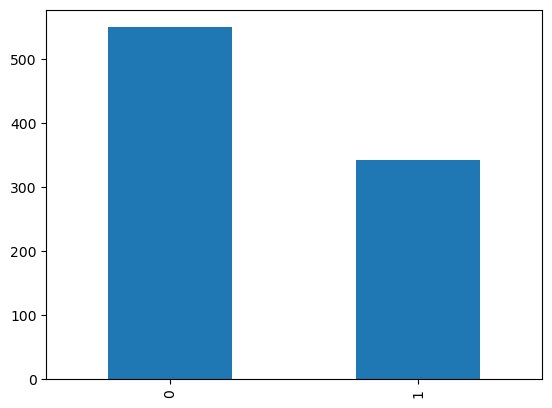

In [4]:
df.Survived.value_counts().plot(kind='bar')

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

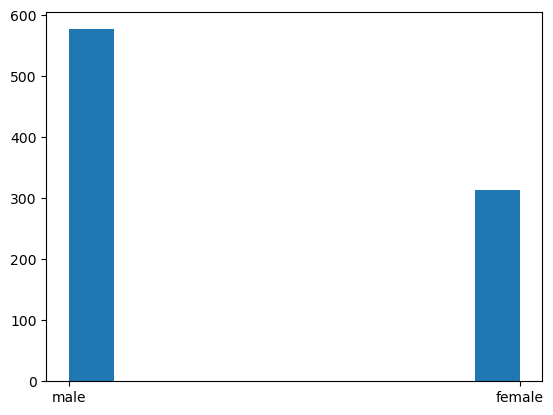

In [5]:
plt.hist(df['Sex'])

<BarContainer object of 891 artists>

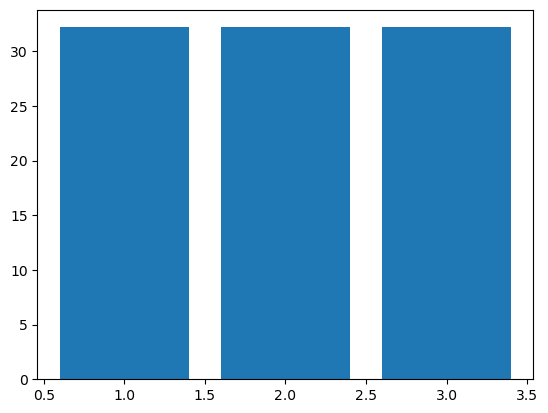

In [6]:
plt.bar(df['Pclass'], np.mean(df['Fare']))

<AxesSubplot:>

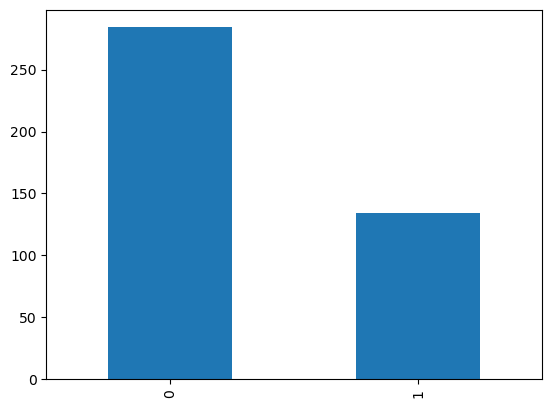

In [7]:
from sklearn.ensemble import RandomForestClassifier

y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.Survived.value_counts().plot(kind='bar')
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

## Step 4: Prepare the data to better expose the underlying data patterns to Machine Learning algorithms 
**NOTES** 
1.	work on copies of the data (keep the original dataset intact)
2.	write functions for all data transformations you apply, for five reasons 
    1.	so you can easily prepare the data enxt time you get a fresh dataset
    2.	so you can apply these transformations in future projects
    3.	to clean and prepare the test set
    4.	to clean and prepare new data isntances once your solution is live
    5.	to make it easy to treat your preparation choices as hyperparameters
---
1.	Data cleaning 
    1.	fix or remove outliers (optional)
2.	fill in missing values (e.g. with zero, mean, median…) or drop their rows (or columns).
    2.	Feature selection (optional): 
    1.	Drop the attributes that proved no useful information for the task.
3.	Feature engineering, where appropirate: 
    1.	Discretize continuous features
    2.	decompose features (e.g. categorical ,date/time, etc.).
    3.	Add promising transformations of features (e.g. log(x), sqrt(x) etc.)
    4.	aggregate features into promising new features
4.	Feature scaling 
    1.	standardize or normalize features


## Step 5: Explore many different models and shortlist the best ones 
**NOTES**
1.	if the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
2.	once again, try to automate these steps as much as possible
---
1.	train many quick-and-dirty models from different cateogires (e.g. linear, naive Bayes, SVM, Random Forest, neural net, etc.) using standard parameters.
2.	Measure and compare their perfomance 
    1.	foe each model, use n-fold cross-validation and compute the mean and standard deviation of the peformance measure on the N folds
3.	Analyze the most significant variables for each algorithm
4.	Analyse the types of erros the models make 
    1.	What data would a human have used to avoid these errors?
5.	Perform a quick round of feature selection and engineering.
6.	Perform one or two more quick iterations of the five previous steps.
7.	Shortlist the top three to five most promising models, preferring models that make different types of errors,

## Step 6: Fine-tune your models and combine them into a great solution 
**NOTES**
1.	you will want to use as much data as possible for this stope, especially as you move toward the end of fine-tuning
2.	as always, automate what you can

***WARNING***
1.	don’t tweak your model after measuring the generalization error: yoou would just start overfitting the test set.

---
1.	fine-tune the hyperparameters using cross-validation: 
1.	treat your data transformation choises as hyperparameters, especially when you are not sure about them (e.g. if you’re not sure whetehr to replace missing values with zeros or with the median value, or to just drop the rows)
2.	unless there are very few hyperparameter value to explore, prefere random seach over grid search. If training is very long, you may prefere a Bayesian optimization approach (e.g. using Gaussian process priors, as described by Jasper Snoes et al.) - https://arxiv.org/abs/1206.2944
2.	Try Ensemble methods. Combining your best models will often produce better performance than running them individually.
3.	Once you are confident about your final model, measure its performance on the tes set to estimate the generalization error.


## Step 7: Present your solution
1.	Document what you have done.
2.	Create a nice presentation. 
    1.	make sure you highlight hte big picture first
3.	Explain why your solution achievese the business objective
4.	Don’t forget to present interesting points you noticed along the way. 
    1.	Describe what worked and what did not
    2.	List your assumptions and you system’s limitations
5.	Ensure you key findings aer communicated through beautiful visualizations or easy-to-remember statements (e.g. ‘the median income is the number-one predictior of housing prices’)

## Step 8: Launch, monitor, and maintain your system 
1.	Get your solution ready for production (plug into production data inputs, write unt tests, etc.)
2.	Write monitoring code to check your system’s live performance at regular intervals and trigger alrts when it drops. 
    1.	beware of slow degradation: models tend to ‘rot’ as data evolves
    2.	Measuring performance may require a human pipeline (e.g. via a crowdsourcing service)
    3.	Also monitor your inputs’ quality (e.g. a malfunctioning sensor sending random values, or nother team’s output becoming stale). This is particularly imporant for online learning systems
3.	Retrain your models on a regular basis on fresh data (automate as much as possible).
